# Introduction to Dynamic Systems

A **system** is a set of interrelated  that operate together for a common purpose. If the parameters of interest in the system are time varying, it is called **dynamic system**.

<center><img src="Images/dynamicSystem.png" alt="Drawing" style="width: 500px;"/><center>

In absence of random inputs, dynamic systems are characterized by **states**, **inputs** and **outputs**:

#### $$ \textbf{x}(t) = \begin{bmatrix}
x_1 (t) \\
x_2 (t) \\
... \\
x_n (t)
\end{bmatrix},  
\textbf{u}(t) = \begin{bmatrix}
u_1 (t) \\
u_2 (t) \\
... \\
u_p (t)
\end{bmatrix},
\textbf{p}(t) = \begin{bmatrix}
y_1 (t) \\
y_2 (t) \\
... \\
y_l (t)
\end{bmatrix},
\textbf{q}(t) = \begin{bmatrix}
y_1 (t) \\
y_2 (t) \\
... \\
y_r (t)
\end{bmatrix},
\textbf{y}(t) = \begin{bmatrix}
y_1 (t) \\
y_2 (t) \\
... \\
y_m (t)
\end{bmatrix}$$





- State variables $\textbf{x}(t) ∈ \mathbb{R}^{n}$: in most application (such as orbit determination) these are “hidden” variables, so we cannot measure them directly
- Known inputs $\textbf{u}(t) ∈ \mathbb{R}^{p}$: are used to control the system from the outside
- Parameters $\textbf{p}(t) ∈ \mathbb{R}^{l}$: set of scalar values affecting the dynamics of the system
- Random inputs $\textbf{q}(t) ∈ \mathbb{R}^{r}$: randomic inputs described by a stocastic model
- Outputs $\textbf{y}(t) ∈ \mathbb{R}^{n}$: are normally accessible through measurements
  
In this Chapter we assume $\textbf{u}(t) = \textbf{q}(t) = 0$.

Such kind of systems can generally be modeled by a differential equation, which is an equation that contains at least one derivative of an unknown function. The **order** of a differential equation is the order of the highest derivative. Any n-th order differential equation can be written as a system of n first-order differential equations. The differential equation is **linear** if both sides of the equation are linear combination of the dependent variable and its derivatives, otherwise is **non-linear**.

The dynamic systems can also be classified as **continuous** when the independent variable $t$ varies continuously over some real interval $t∈[t_0,t_f ]$.

## Linear Systems

A dynamic system is **linear** if it can be described using linear differential equations, such as for example the harmonic oscillator with linear damping:

<center><img src="Images/spring.png" alt="Drawing" style="width: 500px;"/><center>

#### $$m\frac{d^2 x}{d^2 t} = -kx - \nu\frac{dx}{dt} $$

The equation above describes how $x$ (displacement of the mass $m$ respect to its position at rest) varies with $t$, depending on parameter's value $k$ and $\nu$. 


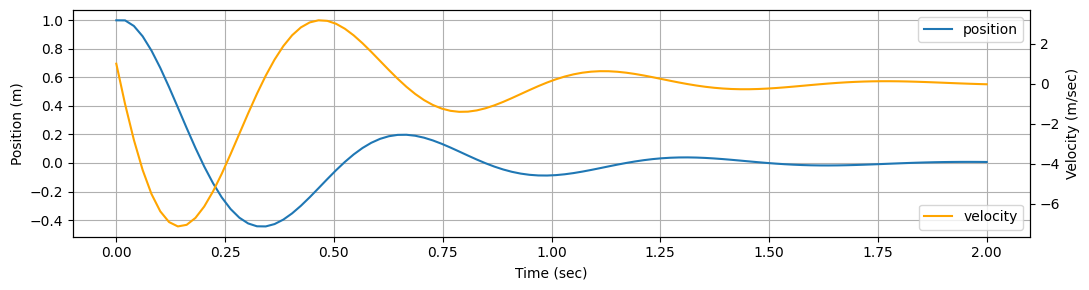

In [1]:
from estimation import *
################ Input data #########################
# initial conditions
x1_0 = 1  # initial position
x2_0 = 1  # initial velocity
# parameters 
m = 1 # kg
nu = 5  # dumping coefficient
k = 100 # spring constant
#####################################################

SolveOScillator(x1_0, x2_0, m, nu, k)

The system is modeled by a second order differential equation, so we can write it as a system of two, first order differential equations. For the example above we define 

- $x_1=x$
- $x_2 = dx_1/dt$

to be the **state vector** $\mathbf{x}$ of the dynamic system:

#### $$\textbf{x}=\begin{bmatrix}
x_1\\ 
x_2\\ 
\end{bmatrix}$$

so, we can get the following system in vectorial form:

#### $$ \begin{bmatrix}
\frac{d}{dt} x_1\\
\frac{d}{dt} x_2
\end{bmatrix}=\begin{bmatrix}
x_2\\
-\frac{k}{m} x_1  -\frac{\nu}{m} x_2\\
\end{bmatrix} =\begin{bmatrix}
0 &  1\\
-\frac{k}{m} &  -\frac{\nu}{m}\\
\end{bmatrix}\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}$$

or, in compact notation,

### $$ \dot{\textbf{x}}(t)=\textbf{F}\textbf{x}(t) $$

In the above notation, $ \mathbf{F} ∈ \mathbb{R}^{n*n} $ is the **state (system) matrix**. It relates the time evolution model (defined by the differential equations) with the state by mean of partial derivatives; in this case it is constant because the parameters $k/m$ and $\nu/m$ do not change over time. This is an example of **time invariant** dynamic system, when the coefficients of the dependent variable and its derivatives do not change with time. If this is not the case, the system is **time variant**.

The system is then observed by one or more measurement devices, which can produce measurements $\mathbf{y}(t)$:

<center><img src="Images/dynamicSystem2.png" alt="Drawing" style="width: 950px;"/><center>

So, we can also write the following equation to relate the measurements with the state:

### $$\mathbf{y}(t)= \mathbf{H}\mathbf{x}(t) $$

With $ \mathbf{H} ∈ \mathbb{R}^{q*n} $ being the **output sensitivity matrix**. The above two equations constitute the basics to deal with linear continous systems.


## Discrete Linear Systems
For many practical problems we may be interested in knowning the state of a system at a discrete set of times $t∈[t_1, t_2,t_3…]$, for example when measurements are available. In this case we define the system as **discrete**.

Discrete time invariant systems are represented by the following equations instead: 

### $$ \begin{matrix}
\mathbf{x}_{k+1}=\mathbf{\Phi}(t_{k+1},t_k) \mathbf{x}_k \\
\mathbf{y}_k= \mathbf{H}\mathbf{x}_k
\end{matrix}  $$
    
where $ \mathbf{\Phi}(t_{k+1},t_k) ∈ \mathbb{R}^{n*n} $ is the **state transition matrix**. It relates the state vector at instant $k$ to the state vector of a later instant $k+1$. It is related to the state matrix $\mathbf{F}$ by the following relationship:

#### $$  \frac{d}{dt}\mathbf{\Phi}\left ( \tau, t \right )=\mathbf{F}\left ( \tau \right )\mathbf{\Phi}\left ( \tau, t \right ) $$

, so it can be derived (among other method) from the integration of the above equation. For example, consider the following model describing a linear motion:

#### $$ x(t) = x_0 + v_0 t$$

, which is the solution of the differential equation $\ddot{x}(t) = 0$. We can define the state vector as 

#### $$ \mathbf{x}=\begin{bmatrix}
x &  \dot x\\
\end{bmatrix}^T=\begin{bmatrix}
x_0 + v_0t \\
v_0\end{bmatrix}$$

In matrix form we have

#### $$\dot{\mathbf{x}}=\begin{bmatrix}
\dot x &  \ddot x\\
\end{bmatrix}^T=\begin{bmatrix}
v_0 \\
0\end{bmatrix}=
\begin{bmatrix}
0 &  1\\
0 &  0\\
\end{bmatrix}\begin{bmatrix}
x_0+v_0t \\
v_0\end{bmatrix}=\begin{bmatrix}
0 &  1\\
0 &  0\\
\end{bmatrix} \mathbf{x}=\mathbf{F}\mathbf{x}$$



In this case we have:

#### $$ \mathbf{\Phi}\left ( t+\Delta t \right )=\begin{bmatrix}
1 &  \Delta t\\
0 &  1\\
\end{bmatrix}$$

...and the state evolution is described by

#### $$ \mathbf{x}\left ( t_0+\Delta t \right )=\mathbf{\Phi}\mathbf{x}\left ( t_0 \right )= \begin{bmatrix}
1 &  \Delta t\\
0 &  1\\
\end{bmatrix}\begin{bmatrix}
x_0 \\ v_0
\end{bmatrix} $$

Being $t_k, t_j$ two different times, the state transition matrix has the following properties:

#### $$\mathbf{\Phi}(t_k,t_k) = \mathbf{I}$$
#### $$\mathbf{\Phi}(t_k,t_j) = \mathbf{\Phi^{-1}}(t_j,t_k)$$
#### $$\mathbf{\Phi}(t_k,t_j) = \mathbf{\Phi}(t_k,t)*\mathbf{\Phi}(t,t_j)$$

## Non-linear Systems

A non-linear system is a system in which the change of the output is not proportional to the change of the input. Typically, the behavior of a non-linear system is described in mathematics by a non-linear system of equations, where the equation(s) to be solved cannot be written as a linear combination of the unknown variables or functions that appear in them. As non-linear dynamical equations are difficult to solve, non-linear systems are commonly approximated by linear equations (**linearization**). 

#### $$ m\frac{d^2 \theta}{d^2 t} = -\frac{g}{l} \sin \theta $$

A typical non-linear problem is the dynamics of a frictionless pendulum under the influence of gravity. The differential equation which governs its motion is

<center><img src="Images/pendulum.png" alt="Drawing" style="width: 200px;"/><center>



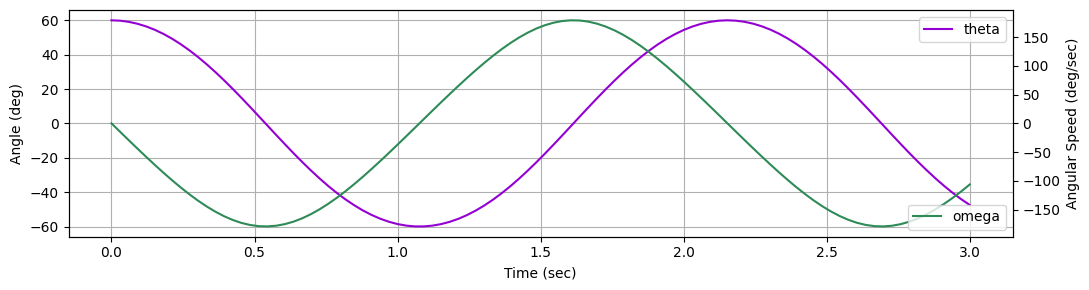

In [2]:
from estimation import *
################ Input data #########################
# initial conditions
theta_0 = 60  # initial angular position (deg)
omega_0 = 0  # initial angular speed (deg/sec)
# parameters 
rodLenght = 1 # m
#####################################################

SolvePendulum(theta_0, omega_0, rodLenght)

We define the state vector as:

#### $$\textbf{x}=\begin{bmatrix}
\theta\\ 
\omega\\ 
\end{bmatrix}$$

Decomposing the differential equation we have:

#### $$ \begin{matrix}
\frac{d}{dt} \theta = \omega \\
\frac{d}{dt} \omega = -\sin \theta
\end{matrix} $$

...and you see as it is not possible to relate the state vector derivative to the state itself (in the form $ \dot{\textbf{x}}(t) = \textbf{A}\textbf{x}(t)$). While some time we find the solution by analytically integrating the equation of motion, the most common way to solve this issue is to **linearize** the equations of motion in the surrounding of a particular state (*initial conditions*).

In the above case, we find that $\sin \theta \approx \theta$ for $\theta \approx 0$, so for small $\theta$ we have

#### $$ m\frac{d^2 \theta}{d^2 t} = -\frac{g}{l} \theta $$

The state transition matrix can be used for any non-linear dynamical system and is used to approximate the dynamics of a system over short period of times. Its components are the partial derivatives of the state at time $t_{k+1}$ with respect to the state at time $t_k$

### $$ \mathbf{\Phi}(t_{k+1},t_k)=\frac{\partial  \mathbf{x}_{k+1}}{\partial \mathbf{x}x_k}, \quad \mathbf{\Phi} \in \mathbb{R}^{n*n}$$

so, the same equation discussed for the linear systems is valid here:

### $$ \begin{matrix}
\mathbf{x}_{k+1}=\mathbf{\Phi}(t_{k+1},t_k) \mathbf{x}_k \\
\mathbf{y}_k= \mathbf{H}\mathbf{x}_k
\end{matrix}  $$